In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Funciones de soporte
# -----------------------------------------------------------------------

from src import soporte as sp

In [2]:
# cargamos el csv obtenido de la fase de exploracion y limpieza
df = pd.read_csv("archivos/df_union.csv") 
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


# Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo ✨

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'flights_booked' y 'education' ✨

- flights_booked -> cantidad de vuelos/mes -> int64 -> valor numérico continuo
- education -> Nivel educativo alcanzado por el cliente -> var categorica

In [3]:
df_filtrado = df[['flights_booked', 'education']]
df_filtrado.head()

,flights_booked,education
0,3,Bachelor
1,2,Bachelor
2,14,Bachelor
3,4,Bachelor
4,0,Bachelor


In [4]:
print(f'Num. filas df_filtrado: {df_filtrado.shape[0]}')
print(f'Num. columnas df_filtrado: {df_filtrado.shape[1]}')

Num. filas df_filtrado: 403760
Num. columnas df_filtrado: 2


2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo ✨

In [5]:
# Agrupamos por nivel educativo
df_agrupado = df_filtrado.groupby('education')['flights_booked']
# principales estadisticos de df_vuelos
display(df_agrupado.describe().round(2))

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.11,5.22,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.17,5.25,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.18,5.26,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.18,5.24,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.20,5.21,0.0,0.0,1.0,8.0,21.0


3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

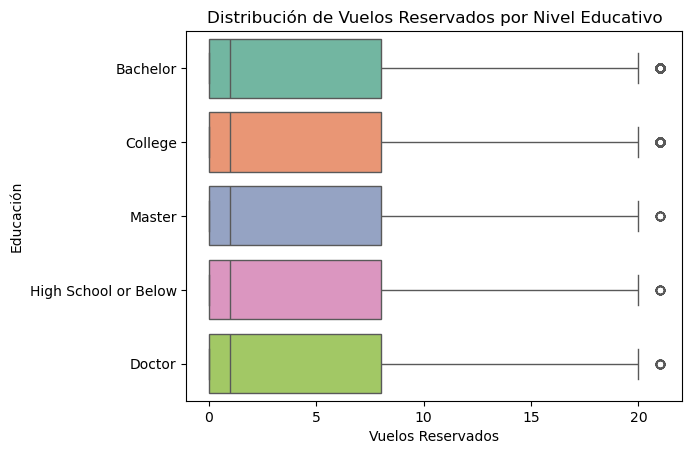

In [6]:
# boxplot para visualizar mejor distribuición entre estas dos columnas

sns.boxplot(x='flights_booked',
            y='education',
            data=df_filtrado,
            palette="Set2")
plt.title('Distribución de Vuelos Reservados por Nivel Educativo')
plt.xlabel('Vuelos Reservados')
plt.ylabel('Educación');

Los valores de la mediana son similares para todos los grupos y todos los grupos presentan valores atipicos

# Comprobamos si es un problema de contingencia ✨

- La prueba de contingencia se utiliza cuando deseas analizar la relación entre dos variables categóricas, por lo que no aplicaría a este caso al ser flights_booked una variable numérica.

- Calculamos igualmente la tabla de contingencia para comprobar que no nos da valores claros que analizar:


In [7]:
pd.crosstab(df_filtrado["education"], df_filtrado["flights_booked"])

flights_booked,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
education,,,,,,,,,,,,,,,,,,,,,,
Bachelor,123264,7949,8423,11436,8033,9444,8606,9050,8958,8790,8285,9709,6492,6789,4358,4081,2678,2392,1813,962,708,347
College,49426,3115,3508,4612,3209,3881,3505,3687,3613,3614,3407,4081,2677,2698,1814,1696,1145,1023,766,354,308,121
Doctor,8538,579,589,818,586,605,608,662,665,614,612,690,426,464,326,286,207,158,142,79,52,25
High School or Below,9060,634,715,794,580,722,636,701,686,693,628,749,485,499,336,330,186,194,139,65,65,18
Master,5840,390,406,568,413,432,492,461,435,453,431,476,302,332,223,189,138,132,98,36,23,17


# Es un problema de Medias ✨
Ya que flights_booked es una variable numerica continua 

# Los datos siguen una distribucion normal?

- Solo las variables numericas continuas pueden tener una dist.normal, esto nos indica que debemos realizar una prueba NO parametrica, ya que education no tiene una dist.normal al ser una var. categorica -> son grupos independientes -> utilizaremos el test de Mann-Whitney

- A modo de practica se calculara la dist.normal de flights_booked

# NOTA POST EVALUACION 🚨
A/B Testing se hace siempre con 1 var numerica y otra categorica que sirve a modo de etiqueta 

In [8]:
sp.normalidad(df_filtrado, "flights_booked")

Para la columna flights_booked los datos no siguen una distribución normal.


# Test de Mann-Whitney
- Para realizar este test necesitamos tener dos grupos diferenciados
- Dividiremos los estudio en universitarios y no universitarios para el test

In [9]:
# Definimos los grupos en funcion de si son estudios universitarios o no
university = ['Bachelor', 'Master', 'Doctor']
no_university = ['College', 'High School or Below']

In [10]:
#Crear una columna nueva a nuestro df para asignar el nombre del grupo segun la division que acabamos de hacer -> estudios universitarios o no
df_filtrado['education_level'] = df_filtrado['education'].apply(lambda x: 'University' if x in university else 'No University')


In [11]:
df_filtrado.sample(5)

,flights_booked,education,education_level
269835,9,High School or Below,No University
181326,0,Bachelor,University
226948,16,Master,University
77937,0,College,No University
168737,19,Bachelor,University


In [12]:
#Hago 2 grupos en funcion de la columna education_level -> seran el grupo de control y grupo test para aplicar en mannwhitneyu
grupo_universitario = df_filtrado[df_filtrado["education_level"] == "University"]["flights_booked"]
grupo_no_universitario = df_filtrado[df_filtrado["education_level"] == "No University"]["flights_booked"]

In [13]:
# Aplicamos test_man_whitney
sp.test_man_whitney(df_filtrado, ['flights_booked'], 'University', 'No University', 'education_level')

Para la métrica flights_booked, las medianas son diferentes.


# NOTA POSTEVALUACION 🚨
test_man_whitney evalua como es la distribucion de los datos, pueden tener diferente distribucion pero misma mediana

Si p_value < 0.05 -> existe una diferencia significativa

Si p_value > 0.05 -> NO existe una diferencia significativa

In [14]:
_, p_value = mannwhitneyu(grupo_universitario, grupo_no_universitario)

print(p_value.round(4))

0.0029


In [15]:
p_value < 0.05

True

- Analizando el p_value se concluye que SI existe una diferencia significativa entre el nivel de estudios y el número de vuelos realizados, teniendo en cuenta la division de estudios realizada. Tiene sentido ya que los nivel de estudio superiores proporcionan un mayor salario y por tanto una mayor posibilidad de realizar vuelos.

- NEXT STEPS: Hacer la prueba con divisiones de estudios diferentes